<h1> Examen módulo 4 </h1>
<h3> Primera parte </h3>

“Medidas de tendencia Central”
Una vez escogido el data set calcule las medida de tendencia central con una columna con datos numéricos. 
Es decir tome un Análisis univariado de alguna variable y calcule los estadísticos y determine que tipo de distribucion tiene ( graficos).
Tome por ejemplo el archivo de “Medidas de tendencia central”, realice las analisis y conclusiones.

<h4> Preparación para el análisis </h4>

In [135]:
pip install tabulate

In [468]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
from sklearn.preprocessing import StandardScaler
from pylab import *
from tabulate import tabulate
from scipy import stats

pd.options.display.max_columns = None

In [102]:
#importamos el dataset y revisamos información general

pokemon = pd.read_csv("pokemon.csv")
pokemon.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [103]:
#Revisamos los estadígrafos de la base completa
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [104]:
#identificamos las variables que contiene el dataset
print(pokemon.columns)

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


Como notamos, hay dos columnas que tienen un espacio y un punto. Eso producirá problemas con algunos métodos, así que debemos renombrarlas

In [227]:
pokemon.rename(columns={'#': '#',
                        'Name': 'Name', 
                        'Type 1': 'Type_1', 
                        'Type 2': 'Type_2', 
                        'Total': 'Total', 
                        'HP': 'HP', 
                        'Attack': 'Attack',
                        'Defense': 'Defense',
                        'Sp. Atk': 'Sp_Atk', 
                        'Sp. Def': 'Sp_Def', 
                        'Speed': 'Speed',
                        'Generation': 'Generation',
                        'Legendary': 'Legendary'}, inplace=True)

En cuanto a la estructura del set de datos, podemos concluir que nueve de las 13 columnas son numéricas y se puede hacer la descripción estadística de tendencia central. Revisando la información del set de datos, sabemos que tanto la variable "#" y la variable "Generation" son numéricas, pero nominales, por lo que contamos con siete columnas que analizar descriptivamente.

In [231]:
#Revisamos el tipo de dato que tiene cada columna para confirmar
for column in pokemon.columns:
    print(column, type(column))

# <class 'str'>
Name <class 'str'>
Type_1 <class 'str'>
Type_2 <class 'str'>
Total <class 'str'>
HP <class 'str'>
Attack <class 'str'>
Defense <class 'str'>
Sp_Atk <class 'str'>
Sp_Def <class 'str'>
Speed <class 'str'>
Generation <class 'str'>
Legendary <class 'str'>


Como podemos notar, todas las variables numéricas están en formato "str", quizá tienen valores perdidos

In [232]:
#contaremos valores perdidos
print("isna \n", pokemon.isna().count())
print("isnull \n", pokemon.isnull().count())

isna 
 #             800
Name          800
Type_1        800
Type_2        800
Total         800
HP            800
Attack        800
Defense       800
Sp_Atk        800
Sp_Def        800
Speed         800
Generation    800
Legendary     800
dtype: int64
isnull 
 #             800
Name          800
Type_1        800
Type_2        800
Total         800
HP            800
Attack        800
Defense       800
Sp_Atk        800
Sp_Def        800
Speed         800
Generation    800
Legendary     800
dtype: int64


Según el conteo de los métodos isna() e isnull(), parecieran ser todos los valores valores perdidos. Se realizará los análisis asumiendo que es un problema del formato del csv y que las librerías pueden ejecutar todo.

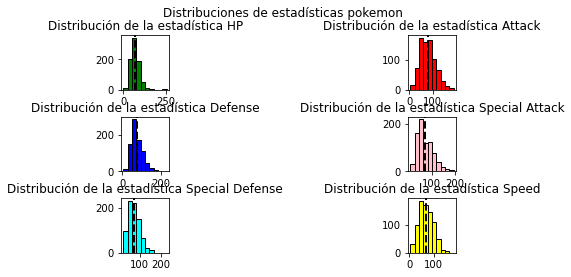

In [233]:
#Graficaremos las seis variables de intervalo, entendiendo que la variable "Total" es la suma de las seis graficables
plt.subplot(3, 2, 1) #la cuadrícula es 1x2, el número de serie es 1, el primer número es el número de filas, el segundo número es el número de columnas, lo que indica la disposición de los subgrafos, y el tercer número es el número de serie del subgrafo
plt.hist(pokemon.iloc[:, 5], color = "green", edgecolor = "black")
plt.axvline(pokemon["HP"].mean(), color='k', linestyle='dashed', linewidth=2)
plt.title("Distribución de la estadística HP")
plt.subplot(3, 2, 2)
plt.hist(pokemon.iloc[:, 6], color = "red", edgecolor = "black")
plt.axvline(pokemon["Attack"].mean(), color='k', linestyle='dashed', linewidth=2)
plt.title("Distribución de la estadística Attack")
plt.subplot(3, 2, 3)
plt.hist(pokemon.iloc[:, 7], color = "blue", edgecolor = "black")
plt.axvline(pokemon["Defense"].mean(), color='k', linestyle='dashed', linewidth=2)
plt.title("Distribución de la estadística Defense")
plt.subplot(3, 2, 4)
plt.hist(pokemon.iloc[:, 8], color = "pink", edgecolor = "black")
plt.axvline(pokemon["Sp_Atk"].mean(), color='k', linestyle='dashed', linewidth=2)
plt.title("Distribución de la estadística Special Attack")
plt.subplot(3, 2, 5)
plt.hist(pokemon.iloc[:, 9], color = "cyan", edgecolor = "black")
plt.axvline(pokemon["Sp_Def"].mean(), color='k', linestyle='dashed', linewidth=2)
plt.title("Distribución de la estadística Special Defense")
plt.subplot(3, 2, 6)
plt.hist(pokemon.iloc[:, 10], color = "yellow", edgecolor = "black")
plt.axvline(pokemon["Speed"].mean(), color='k', linestyle='dashed', linewidth=2)
plt.title("Distribución de la estadística Speed")
plt.suptitle("Distribuciones de estadísticas pokemon") #título de la figura con 6 gráficos
#ajustamos las distancias para mejorar la visualización
#plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=5, hspace=0.5)

Ahora podríamos determinar la dispersión de los datos por medio del rango intercuartil, lo haremos partiendo desde la función describe

In [451]:
df = pokemon.describe()
q1 = df.loc["25%"]
q3 = df.loc["75%"]
iqr = q3 - q1
disp = df.loc["std"]/abs(df.loc["mean"])
tabla = pd.concat([df.loc["mean"], df.loc["min"], df.loc["max"], disp, iqr], axis = 1)#generamos un dataframe para presentar la información
tabla.columns = ["Media", "Mínimo", "Máximo", "Coef. de dispersión", "Rango Intercuartil"] #agregamos cabeceras a las filas
tabla = tabla.drop(["#", "Total", "Generation"], axis = 0) #eliminamos las variables que no informan
titulo_t1 = [["Tabla resumen"]]
print(tabulate(titulo_t1, tablefmt="grid"))
print(tabulate(tabla, headers=tabla.columns, tablefmt="grid", numalign = "center")) #formateamos usando tabulate

+---------------+
| Tabla resumen |
+---------------+
+---------+---------+----------+----------+-----------------------+----------------------+
|         |  Media  |  Mínimo  |  Máximo  |  Coef. de dispersión  |  Rango Intercuartil  |
+=========+=========+==========+==========+=======================+======================+
| HP      | 69.2588 |    1     |   255    |       0.368685        |          30          |
+---------+---------+----------+----------+-----------------------+----------------------+
| Attack  | 79.0012 |    5     |   190    |       0.410846        |          45          |
+---------+---------+----------+----------+-----------------------+----------------------+
| Defense | 73.8425 |    5     |   230    |       0.422297        |          40          |
+---------+---------+----------+----------+-----------------------+----------------------+
| Sp_Atk  |  72.82  |    10    |   194    |       0.449359        |        45.25         |
+---------+---------+----------+----

In [452]:
#contaremos los casos hasta la media
hp_low = pokemon[(pokemon.HP <= pokemon["HP"].mean())]
atk_low = pokemon[(pokemon.Attack <= pokemon["Attack"].mean())]
def_low = pokemon[(pokemon.Defense <= pokemon["Defense"].mean())]
sat_low = pokemon[(pokemon.Sp_Atk <= pokemon["Sp_Atk"].mean())]
sdf_low =  pokemon[(pokemon.Sp_Def <= pokemon["Sp_Def"].mean())]
spd_low =  pokemon[(pokemon.Speed <= pokemon["Speed"].mean())]
#convertiremos los casos bajo la media en dataframe con su porcentaje respecto del total
indices = ["HP", "Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed"]
casos_low = [100 * hp_low["#"].count() / 800,
             100 * atk_low["#"].count() / 800,
             100 * def_low["#"].count() / 800,
             100 * sat_low["#"].count() / 800,
             100 * sdf_low["#"].count() / 800,
             100 * spd_low["#"].count() / 800
            ]
casos_low = pd.DataFrame(casos_low)
casos_low.index = indices
casos_low.columns = ["Casos bajo la media (%)"]
casos_low
#generamos una tabla con la información antes presentada y los casos bajo la media
tabla2 = pd.concat([tabla, casos_low], axis = 1)
print(tabulate(titulo_t1, tablefmt="grid"))
print(tabulate(tabla2, headers=tabla2.columns, tablefmt="grid", numalign = "center"))

+---------------+
| Tabla resumen |
+---------------+
+---------+---------+----------+----------+-----------------------+----------------------+---------------------------+
|         |  Media  |  Mínimo  |  Máximo  |  Coef. de dispersión  |  Rango Intercuartil  |  Casos bajo la media (%)  |
+=========+=========+==========+==========+=======================+======================+===========================+
| HP      | 69.2588 |    1     |   255    |       0.368685        |          30          |           52.75           |
+---------+---------+----------+----------+-----------------------+----------------------+---------------------------+
| Attack  | 79.0012 |    5     |   190    |       0.410846        |          45          |           52.75           |
+---------+---------+----------+----------+-----------------------+----------------------+---------------------------+
| Defense | 73.8425 |    5     |   230    |       0.422297        |          40          |            56         

<b>Conclusión</b>

La tabla resumen nos muestra los valores medios de cada una de las estadísticas para la base de datos de 800 pokemon, de entre la primera y sexta generación.

Del análisis descriptivo podemos concluir que.
1. En el caso de la estadística HP, se observa que los casos se acumulan debajo de la media (52,75%) y que esta variable tiene el menor coeficiente de dispersión y rango intercuartil, es decir, es la distribución menos dispersa, pese a que tiene el mayor rango de todas (254)
2. En el caso de la estadística Attack, observamos que tiene la media más alta, no obstante su mínimo y máximo son los segundos más bajos
3. La estadística Sp_Atk presenta la mayor dispersión, tanto por su coeficiente de dispersión (0,449), su rango intercuartil (45,25), desviación estándar (32,7), y además es la variable que considera más casos debajo de la media (56,8%)
4. La estadística Speed es la que tiene la media más baja del set (68,28), el rango más bajo (175), pese a que sus valores de coeficiente de dispersión y rango intercuartil están en el promedio de las demás variables
5. Tanto las variables Sp_Atk y Defense son las que agrupan más casos bajo la media, lo que es consistente con lo que se puede apreciar en los histogramas. Lo mismo ocurre con la mayor agrupación de valores en torno a la media para la variable Attack.]

<h3> Segunda Parte </h3>
Continuando con el análisis univariado, calcule las medidas de dispersión. (std , median, valores min, valores max, rango, cuártiles, rango intercuartil) de la variable que esta analizando en la primera parte.
Realice los gráficos histplot y boxplot, realicé analisis y conclusiones.

Dado que la variable Attack es la más homogénea, haremos los análisis solicitados con esta variable.

In [371]:
atk = pokemon["Attack"]
atk_disp = [atk.std(),
            atk.median(),
            atk.min(),
            atk.max(),
            atk.max() - atk.min(),
            atk.quantile(0.25),
            atk.quantile(0.75),
            atk.quantile(0.75) - atk.quantile(0.25)
           ]
atk_disp_index = ["Desv. Est",
                 "Mediana",
                 "Mínimo",
                 "Máximo",
                 "Rango",
                 "Cuartil 1",
                 "Cuartil 3",
                 "Rango Interq."
                 ]
atk_desc = pd.DataFrame(atk_disp)
atk_desc.index = atk_disp_index
atk_desc.columns = ["Medidas de dispersión"]

In [370]:
titulo_t2 = [["Tabla de medidas de dispersión Attack"]]
print(tabulate(titulo_t2, tablefmt="grid"))
print(tabulate(atk_desc, headers=atk_desc.columns, tablefmt="grid", numalign = "center"))

+---------------------------------------+
| Tabla de medidas de dispersión Attack |
+---------------------------------------+
+---------------+-------------------------+
|               |  Medidas de dispersión  |
+===============+=========================+
| Desv. Est     |         32.4574         |
+---------------+-------------------------+
| Mediana       |           75            |
+---------------+-------------------------+
| Mínimo        |            5            |
+---------------+-------------------------+
| Máximo        |           190           |
+---------------+-------------------------+
| Rango         |           185           |
+---------------+-------------------------+
| Cuartil 1     |           55            |
+---------------+-------------------------+
| Cuartil 3     |           100           |
+---------------+-------------------------+
| Rango Interq. |           45            |
+---------------+-------------------------+


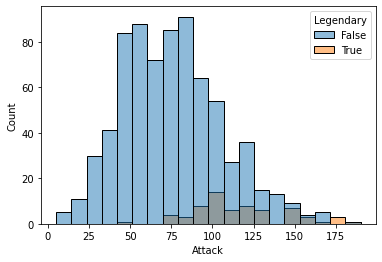

In [372]:
sns.histplot(pokemon, x='Attack', hue='Legendary')
plt.show()

In [456]:
#identificamos los pokemon de la categoría Legendary que se ubican por debajo de la media según el histograma
atk_flier_leg = pokemon[(pokemon.Attack <= 75) & pokemon.Legendary == True]
atk_flier_leg

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
264,245,Suicune,Water,NaN,580,100,75,115,90,115,85,2,True
415,378,Regice,Ice,NaN,580,80,50,100,100,200,50,3,True
416,379,Registeel,Steel,NaN,580,80,75,150,75,150,50,3,True
430,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
537,480,Uxie,Psychic,NaN,580,75,75,130,75,130,95,4,True


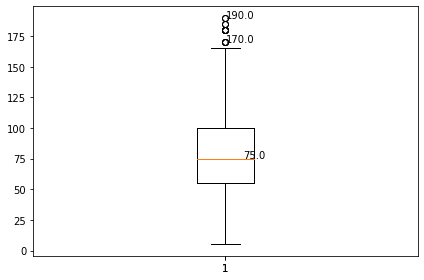

In [423]:
#boxplot de la variable attack con los bigotes a 1,5 de la media
plt.boxplot(atk)
plt.tight_layout()

#agregamos etiquetas con valores a partir del diccionario que produce el metodo boxplot

bp_dict = plt.boxplot(atk, vert=True)
bp_dict.keys()


for line in bp_dict['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    text(x, y, '%.1f' % y,
         horizontalalignment='center') # draw above, centered

for line in bp_dict['fliers']:
    x, y = line.get_xydata()[0] 
    text(x,y, '%.1f' % y,
         horizontalalignment='left')
    x, y = line.get_xydata()[6] 
    text(x,y, '%.1f' % y,
         horizontalalignment='left')

plt.show()

In [455]:
#identificamos los outliers que están por encima de 1,5 veces la media

atk_flier = pokemon[(pokemon.Attack >= 170)]
atk_flier_p = pd.DataFrame([atk_flier["Name"], atk_flier["Attack"], atk_flier["Legendary"]]).transpose()
atk_flier_p

,Name,Attack,Legendary
163,MewtwoMega Mewtwo X,190,True
232,HeracrossMega Heracross,185,False
424,GroudonPrimal Groudon,180,True
426,RayquazaMega Rayquaza,180,True
429,DeoxysAttack Forme,180,True
494,GarchompMega Garchomp,170,False
711,KyuremBlack Kyurem,170,True


<b> Conclusión </b>

Del análisis de la dispersión de la variable Attack podemos concluir que:
1. Tiene un rango de 185 puntos, con el mínimo de ataque en 5, y la media en 75.
2. El histograma nos muestra con claridad que salvo cinco casos, los pokemon de categoría Legendary tienen una estadística de ataque superior a la media. El más extremo de estos tiene un ataque de 50, lo que lo ubica en el primer cuartil.
3. Del analisis de boxplot podemos ver que los outliers comienzan en los 170 puntos de Attack, al revisar los casos identificamos que estos valores extremos corresponden a siete casos, de los cuales solo dos no son de la categoría Legendary.
4. El boxplot también nos muestra que no existen casos con un bajo valor de Attack que correspondan a valores extremos (> 1,5 veces la media)

<h3> Tercera Parte </h3>
Normalización y correlación
⁃ Relaciones 2 variables y encontré que tipo de correlación existe (en este caso que si implique causalidad).
⁃ Realice una normalización de la variable X , con el Z-score
⁃ Grafique dicha variable como se ve sin escalamiento y con escalamiento (Indentifique que escalimiento conviene mas, de los vistos en clase).

Por lo que conocemos de la base de datos, utilizaremos las dos variables relacionadas al ataque para este análisis. 

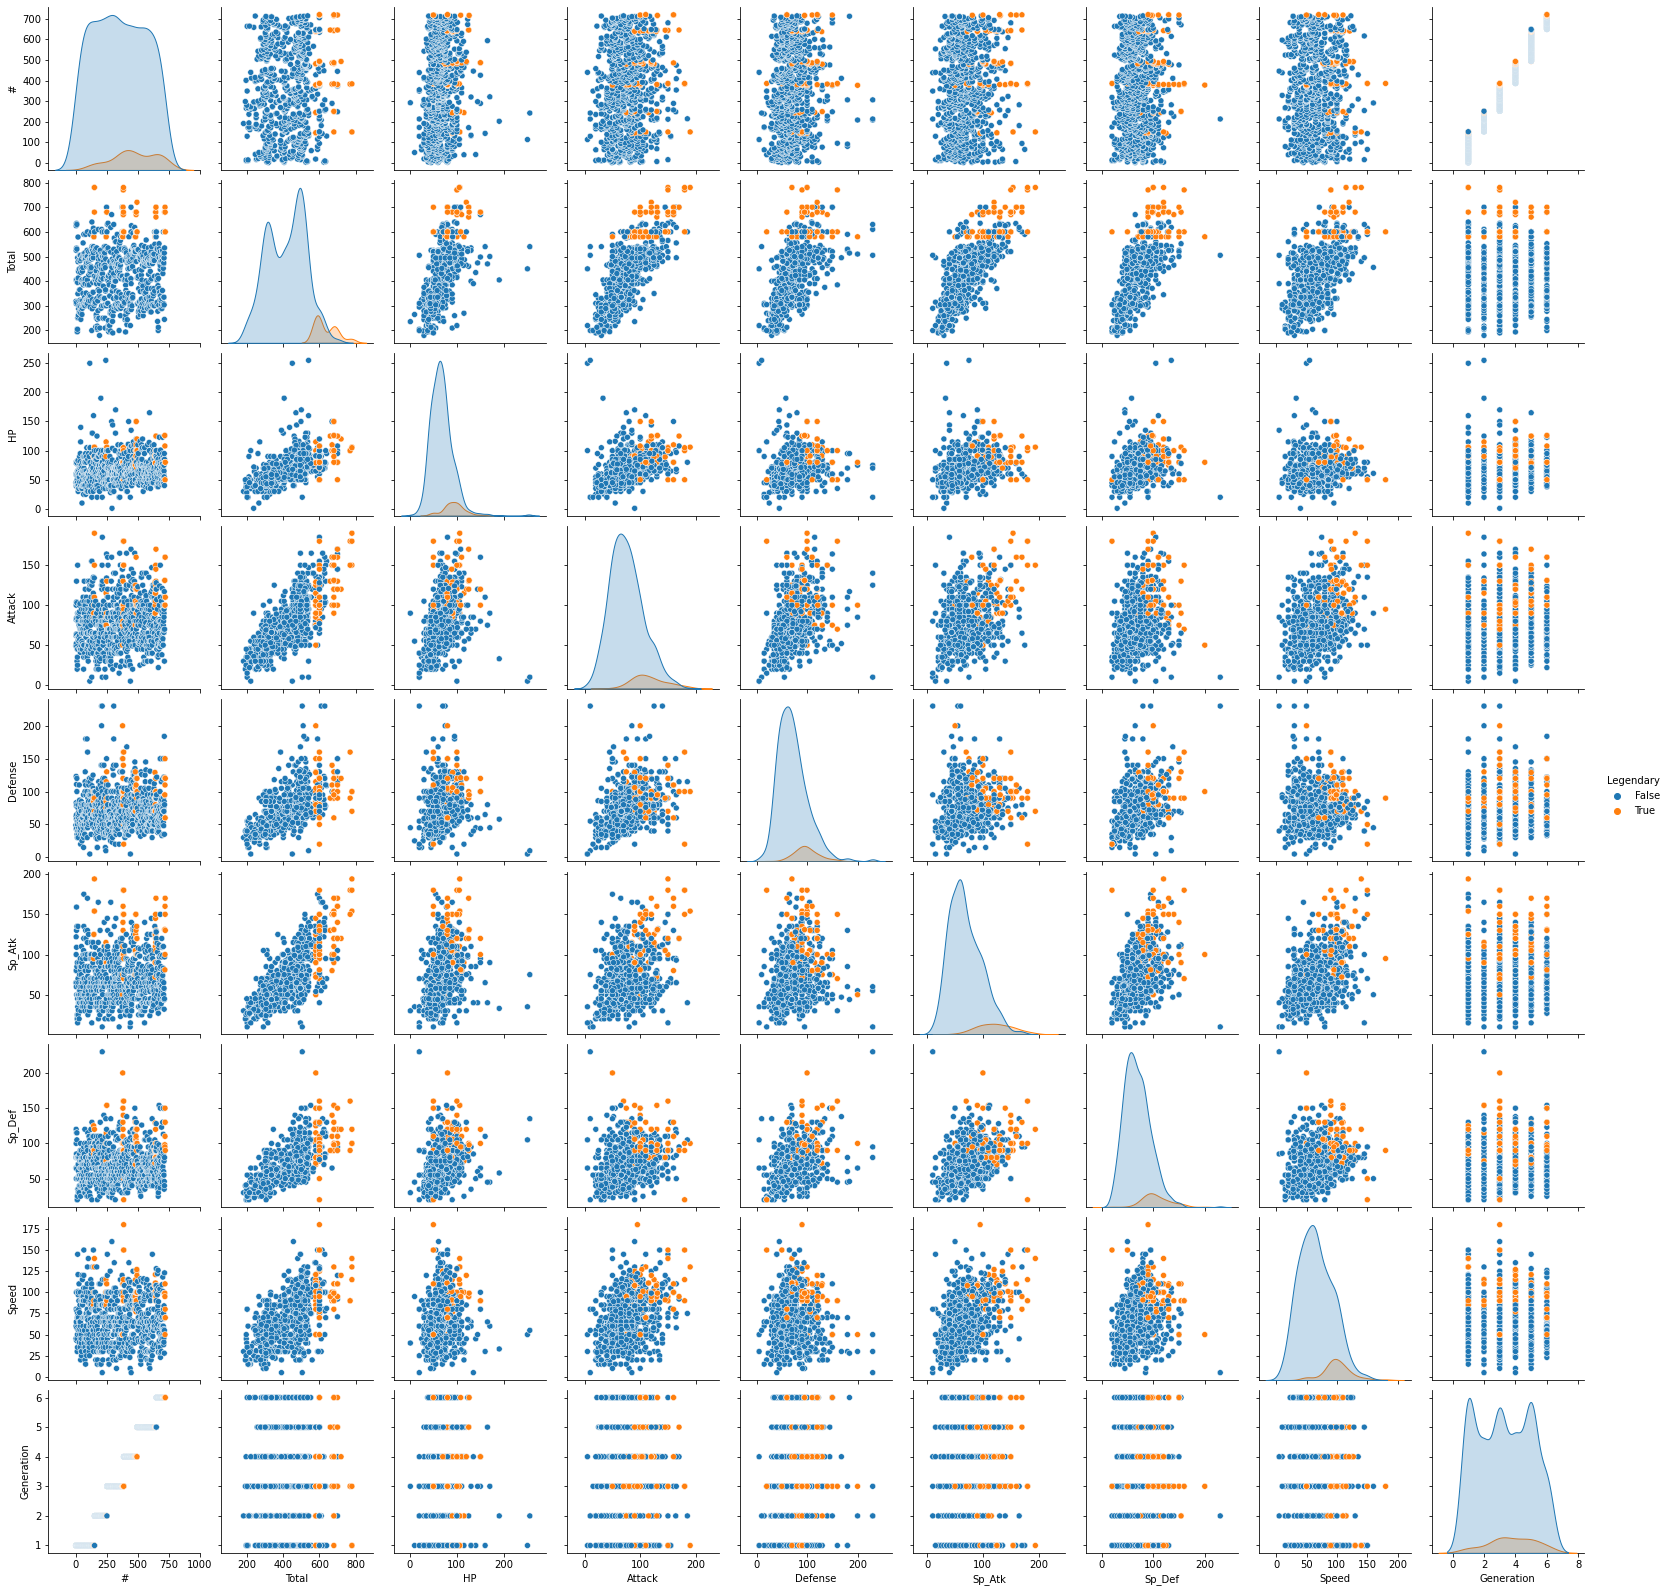

In [481]:
#alivianaremos el procesamiento eliminando las variables categóricas
pokemon_clean = pokemon.drop(["Name", "Type_1", "Type_2"], axis = 1)

#hacemos una previsualización por medio del método pairplot
#sns.pairplot(pokemon_clean, height=5, aspect=.8, kind="reg")
sns.pairplot(pokemon_clean, hue = "Legendary")
plt.show()

In [494]:
#aplicamos el escalador
scaler = StandardScaler()
scaled = scaler.fit_transform(pokemon_clean[["HP", "Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed"]])
scaled.T.shape

(6, 800)

In [495]:
covariance_matrix = np.cov(scaled.T) # Datos Traspuestos
covariance_matrix

array([[1.00125156, 0.42291467, 0.23992222, 0.3628334 , 0.37919206,
        0.17617228],
       [0.42291467, 1.00125156, 0.4392361 , 0.39685783, 0.26431995,
        0.38171689],
       [0.23992222, 0.4392361 , 1.00125156, 0.22382839, 0.51138582,
        0.01524566],
       [0.3628334 , 0.39685783, 0.22382839, 1.00125156, 0.50675486,
        0.4736099 ],
       [0.37919206, 0.26431995, 0.51138582, 0.50675486, 1.00125156,
        0.25945744],
       [0.17617228, 0.38171689, 0.01524566, 0.4736099 , 0.25945744,
        1.00125156]])

Revisando la matriz de covarianzas observamos que no existe ninguna correlación negativa entre las seis variables descriptoras de cada pokemon. Revisaremos ahora con el mapa de calor

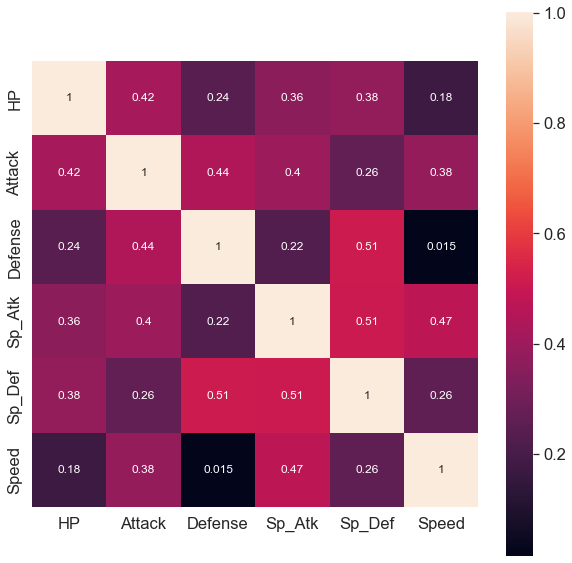

In [496]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(covariance_matrix,
                cbar=True,
                annot=True,
                square=True,
                annot_kws={'size':12},
                yticklabels=["HP", "Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed"],
                xticklabels=["HP", "Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed"]
                )

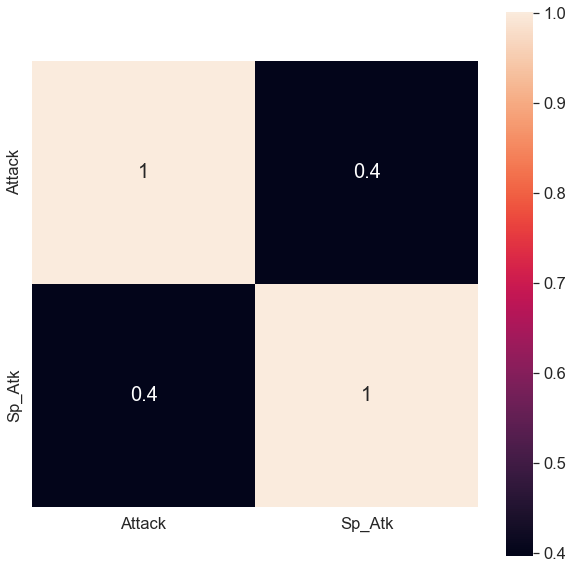

In [498]:
#aplicamos el escalador a solo las variables de ataque, como variables de interés para probar si se modifica el ajuste
scaler = StandardScaler()
scaled = scaler.fit_transform(pokemon_clean[["Attack", "Sp_Atk"]])
scaled.T.shape
covariance_matrix2 = np.cov(scaled.T) # Datos Traspuestos
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(covariance_matrix2,
                cbar=True,
                annot=True,
                square=True,
                annot_kws={'size':20},
                yticklabels=["Attack", "Sp_Atk"],
                xticklabels=["Attack", "Sp_Atk"]
                )

Haremos un último análisis para determinar cuál de las seis estadísticas es la que aporta más al total de estadísticas de cada especie

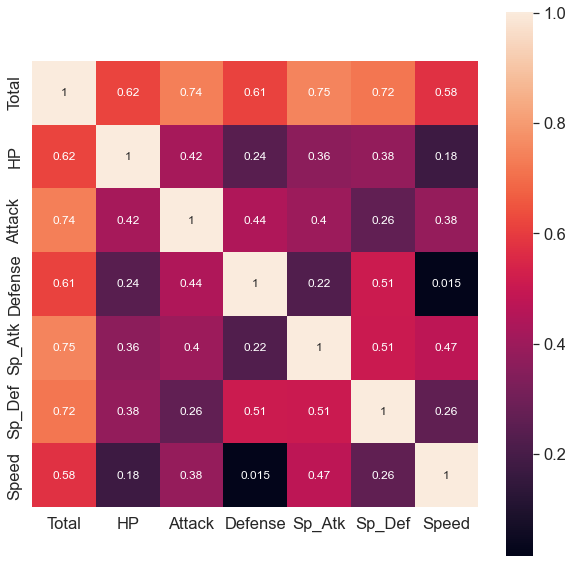

In [525]:
scaler_tot = StandardScaler()
scaled_tot = scaler_tot.fit_transform(pokemon_clean[["Total", "HP", "Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed"]])
scaled_tot.T.shape
covariance_matrix_tot = np.cov(scaled_tot.T) # Datos Traspuestos
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(covariance_matrix_tot,
                cbar=True,
                annot=True,
                square=True,
                annot_kws={'size':12},
                yticklabels=["Total", "HP", "Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed"],
                xticklabels=["Total", "HP", "Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed"]
                )

<b>Conclusión sobre correlaciones.</b>

1. Respecto al método usado, el escalador no arroja diferencias en la correlación ya sea que esté optimizándose para todas las variables analizables o solo para las dos variables de interés.
2. Respecto a la matriz de correlación con las 6 variables, podemos observar que solo existen correlaciones positivas, pero que la correlación entre Defense y Speed es muy baja (0.015), lo que indica que si bien ambas propiedades tienden a aumentar juntas, más bien parecieran operar con independencia, resultando que especies con buena defensa no necesariamente tengan buena velocidad.
3. Por el contrario y también en la matriz de 6 variables, se observa que la correlación más fuerte existe entre las variables Sp_Def, y Defense y Sp_Atk. Lo que indica que las especies con alta defensa especial tenderán a tener mayores valores de defensa o de ataque especial.
4. Al observar las dos variables de interés se aprecia una correlación baja entre los dos tipos de ataque, lo que presenta que, si bien el ascenso en una variable, suele asociarse a un ascenso en la otra, más bien operan con independencia.
5. En cuanto a correlación y causalidad, lo esperable sería que las especies fueran diseñadas con el predominio de una estadística de ataque por sobre la otra, lo que hubiese hecho esperable una correlación negativa y fuerte entre Attack y Sp_Atk; no obstante, solo se encontró una correlación de mediana intensidad. Con esto se puede concluir que, si bien era esperable que cada especie destacara por un tipo de ataque, en realidad pareciera ser que es más fácil clasificar las especies entre atacantes y defensores especiales (correlación de 0,26) que entre atacantes y atacantes especiales (correlación de 0,4).
6. El último análisis, de correlaciones con respecto a la variable Total, que agrega todas las otras variables, nos muestra que la variable que más aporta al Total de estadísticas de cada especie es Sp_Atk (0,75) y la que menos es Speed (0,58).

Antes de proceder a la normalización, revisaremos si corresponden a distribuciones gaussianas

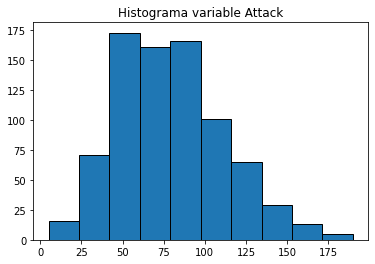

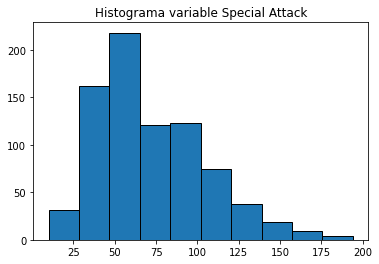

p =  8.279621758263617e-09
The null hypothesis can be rejected
p =  1.8517332268526662e-14
The null hypothesis can be rejected


In [466]:
#generamos histogramas para ambas variables de interés

satk = pokemon["Sp_Atk"]
plt.hist(atk,edgecolor = "black")
plt.title("Histograma variable Attack")
plt.show()
plt.hist(satk, edgecolor = "black")
plt.title("Histograma variable Special Attack")
plt.show()


#realizamos la prueba de normalidad para confirmar lo que podemos observar en los histogramas
k2, p = stats.normaltest(atk)
alpha = 1e-3
print("p = ", p)
p = 8.4713e-19
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

k2, p = stats.normaltest(satk)
alpha = 1e-3
print("p = ", p)
p = 8.4713e-19
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

Conclusión parcial: ninguna de las dos distribuciones corresponde a una distribución gaussiana.

<h3> Cuarta Parte </h3>
Data set = ‘penguins’ de seaborn.
⁃ En base al archivo “Introducción a la distribución” compare 2 variables
⁃ Luego construya la matriz de covarianza con el data set de seaborn.
(tome como ejemplo el archivo de covarianza).

Nota: lo que se pretende en cada una de las partes es ver el análisis del
alumno y las conclusiones, se valorara aportes de los alumnos en cuanto
gráficos o algún otro tipo de análisis que pueda aportar de investigacion.

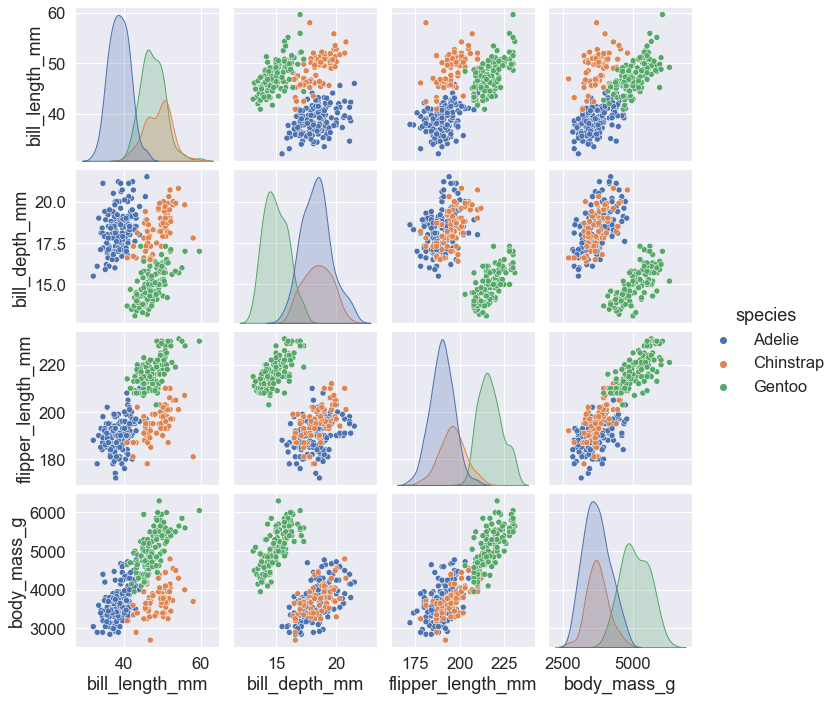

In [505]:
penguins = sns.load_dataset("penguins")
sns.pairplot(penguins, hue="species")

Conclusión parcial:
En el largo del pico son más parecidos los Gentoo con los Chinstrap, pero en la masa corporal, tamaño de la aleta y profunidad del pico son más parecidos los Adelie con los Chinstrap.

In [513]:
penguins = penguins.dropna()

In [516]:
scaler_p = StandardScaler()
scaled_p = scaler_p.fit_transform(penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]])
scaled_p.T.shape
covariance_matrix_p = np.cov(scaled_p.T) # Datos Traspuestos
covariance_matrix_p

array([[ 1.00301205, -0.22931427,  0.65506279,  0.59122657],
       [-0.22931427,  1.00301205, -0.57953203, -0.47343739],
       [ 0.65506279, -0.57953203,  1.00301205,  0.87560835],
       [ 0.59122657, -0.47343739,  0.87560835,  1.00301205]])

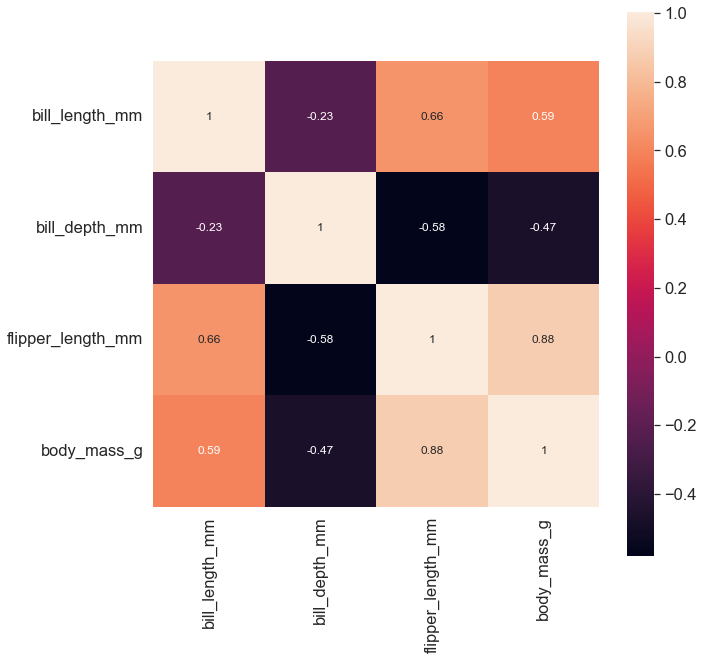

In [517]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm_p = sns.heatmap(covariance_matrix_p,
                cbar=True,
                annot=True,
                square=True,
                annot_kws={'size':12},
                yticklabels=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"],
                xticklabels=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
                )

De lo observado en la matriz de covarianza y el pairplot, convendría probar las correlaciones si se eliminan del análisis los pingüinos Gentoo, que son los de mayor masa corporal y con menor parecido respecto a las otras dos especies. 

In [518]:
p_chicos = penguins.loc[~(penguins["species"] == "Gentoo")]
p_chicos

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
215,Chinstrap,Dream,55.8,19.8,207.0,4000.0,Male
216,Chinstrap,Dream,43.5,18.1,202.0,3400.0,Female
217,Chinstrap,Dream,49.6,18.2,193.0,3775.0,Male
218,Chinstrap,Dream,50.8,19.0,210.0,4100.0,Male


In [521]:
scaler_p_ch = StandardScaler()
scaled_p_ch = scaler_p_ch.fit_transform(p_chicos[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]])
scaled_p_ch.T.shape
covariance_matrix_p_ch = np.cov(scaled_p_ch.T) # Datos Traspuestos
covariance_matrix_p_ch

array([[1.00469484, 0.27523868, 0.50532412, 0.30172482],
       [0.27523868, 1.00469484, 0.3800943 , 0.58906875],
       [0.50532412, 0.3800943 , 1.00469484, 0.48993184],
       [0.30172482, 0.58906875, 0.48993184, 1.00469484]])

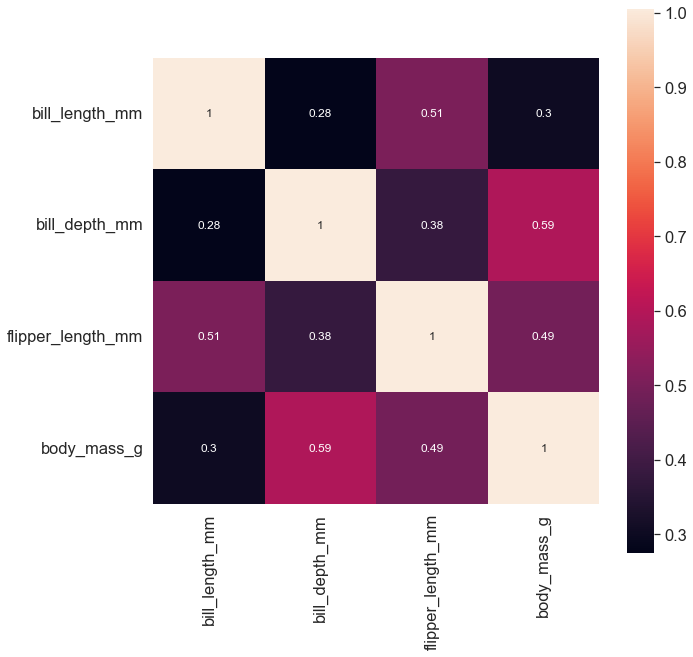

In [522]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm_p = sns.heatmap(covariance_matrix_p_ch,
                cbar=True,
                annot=True,
                square=True,
                annot_kws={'size':12},
                yticklabels=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"],
                xticklabels=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
                )

<b> Conclusión </b>
Al eliminar los pingüinos Gentoo se eliminaron todas las correlaciones negativas de la matriz. 


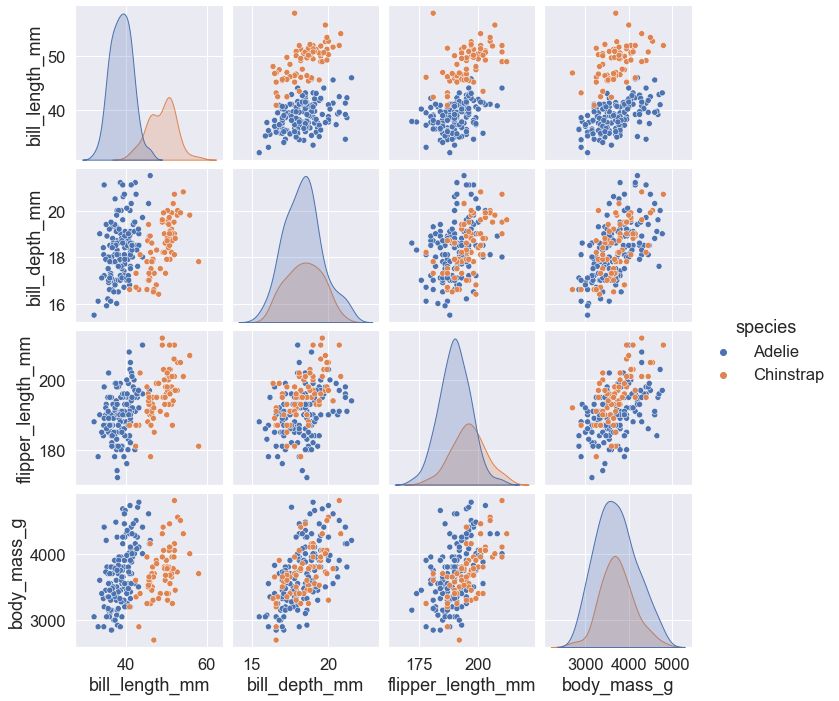

In [523]:
sns.pairplot(p_chicos, hue="species")

Conclusión parcial:
Analizados solo los Adelie con los Chinstrap, podemos notar que son muy parecidos, pero que los Chinstrap tienen un pico de mayor tamaño